In [1]:
%matplotlib inline
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Diamonds Data
If you have ever had an interest in diamonds then this assignment is for you!  This assignment will use a diamonds dataset to explore spark pipelines, linear regression, feature transformation, model scoring, inference, and feature selection.

The diamonds.csv data set contains 10 columns:
- carat: Carat weight of the diamond
- cut: Describes cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
- color: Color of the diamond, with D being the best and J the worst
- clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, etc.  See this web site for an exhaustive ranking of [clarity](https://4cs.gia.edu/en-us/diamond-clarity/?gclid=Cj0KCQjwnqH7BRDdARIsACTSAduMoc2KQbXkO94BxCfBNC5X8YyjAYcFpWThKQMW46cQj_3p0pZ0o84aAuagEALw_wcB).  The web site has a nice sliding scale you can drag to see the relationship between clarity grades.
- depth: depth % - The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- table: table% -  The width of the diamond's table expressed as a percentage of its average diameter
- price: The price of the diamond
- x: Length (mm)
- y: Width (mm)
- z: Height (mm)

# Question 1 (10 pts)
Read the diamonds.csv file into a spark data frame named `diamonds_df`.

In [2]:
# Your code here
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

diamonds_df = spark.read.format("csv").option("header", "true").load(get_training_filename("diamonds.csv"))

In [3]:
# Grading Cell - do not modify
display(diamonds_df.toPandas().head())

,_c0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


# Question 2 (10 pts)
Investigate the diamond data.  Create a pair plot on the real data columns which sumarizes the data. In addition to the pair plot, use a spark dataframe built in function to provide a statistical summary of the data.  Provide a written summary of the pair plot and statistical summary observations.

C:\Users\vidus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


-RECORD 0---------------------
 summary | count              
 _c0     | 53940              
 carat   | 53940              
 cut     | 53940              
 color   | 53940              
 clarity | 53940              
 depth   | 53940              
 table   | 53940              
 price   | 53940              
 x       | 53940              
 y       | 53940              
 z       | 53940              
-RECORD 1---------------------
 summary | mean               
 _c0     | 26970.5            
 carat   | 0.7979397478679852 
 cut     | null               
 color   | null               
 clarity | null               
 depth   | 61.74940489432624  
 table   | 57.45718390804603  
 price   | 3932.799721913237  
 x       | 5.731157211716609  
 y       | 5.734525954764462  
 z       | 3.5387337782723316 
-RECORD 2---------------------
 summary | stddev             
 _c0     | 15571.281096942537 
 carat   | 0.4740112444054196 
 cut     | null               
 color   | null               
 clarity

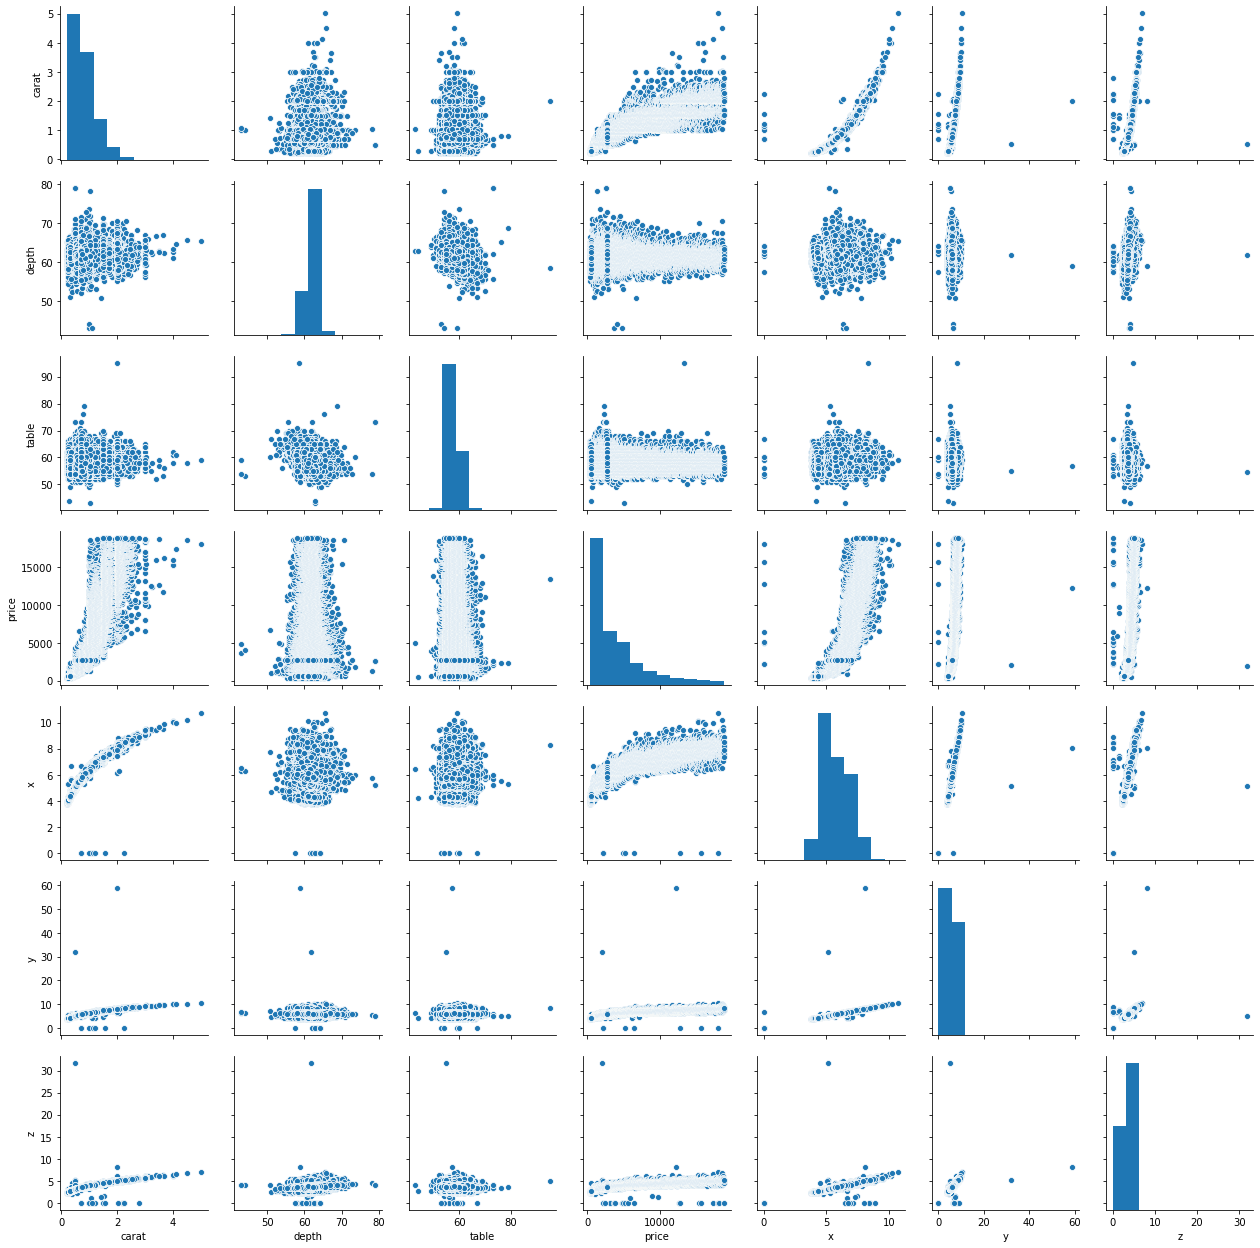

In [4]:
# Your code here
import seaborn as sns
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os


diamonds_df = spark.read.format("csv").option("header", "true").load(get_training_filename("diamonds.csv"))
diamonds_df.describe().show(truncate=False, vertical=True)
diamonds_df_q2 = diamonds_df.select("carat","depth","table","price","x","y","z")
diamonds_df_q2 = diamonds_df_q2.toPandas()
diamonds_df_q2["carat"] = diamonds_df_q2["carat"].astype("float")
diamonds_df_q2["depth"] = diamonds_df_q2["depth"].astype("float")
diamonds_df_q2["table"] = diamonds_df_q2["table"].astype("float")
diamonds_df_q2["price"] = diamonds_df_q2["price"].astype("float")
diamonds_df_q2["x"] = diamonds_df_q2["x"].astype("float")
diamonds_df_q2["y"] = diamonds_df_q2["y"].astype("float")
diamonds_df_q2["z"] = diamonds_df_q2["z"].astype("float")
sns.pairplot(diamonds_df_q2)


Through the pairplot generated from the data, we can observe a linear relationship between diamonds' width, length and height and carat. As each of the dimension increases, carat also increases. 
While we observed several clustered relationships amongs price, table and depth, it can still be infered from the pairplot that positive relationship between price and other features existed.
The histogram on the diagonal shows the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

## Statistical summary of the data

In the statistical summary, we are aware that the average carat number of the 53940 listed diamonds is around 0.79 with the average price just shy of 4000 dollars. 
The dataset is balanced with small standard deviations across diamonds' dimensions data. 
Through observing the dataset, three catergorial dataset are used in decribing the diamonds' quality in cut, color and clarity. 
We will have to conduct feature engineering on these ordinal data in order to feed into the model later.


# Question 3 (20 pts)
There are one or more columns of data in diamonds_df which are not in an appropriate format for performing linear regression.  Perform feature engineering on all columns which are not in a format which is ready for use in a linear regression model.  Create a new data frame named `diamonds_df_xformed` which contains the same number of columns and the same column names as diamonds_df.  Transform diamonds_df such that diamonds_df_xformed is ready to feed into a linear regression model for training.  diamonds_df_xformed Shall contain new feature engineered columns that can be directly used in linear regression.  Encapsulate your feature engineering / transformation code into a spark pipeline named feature_engineering_pipe.  Describe in words all columns on which you performed feature engineering.  Include the specific transformation algorighm used, and your reasoning for using the chosen algorithm.  We expect to see an explanation for each and every column on which you perform feature engineering.

In [6]:
# your code here
# Task 1 & Task 2
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.ml import feature
from pyspark.ml import classification
from pyspark.sql import functions as fn
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator, \
    MulticlassClassificationEvaluator, \
    RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import Row
from pyspark.ml.feature import StringIndexerModel

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

diamonds_df = spark.read.format("csv").option("header", "true").load(get_training_filename("diamonds.csv"))
#cut: Describes cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
#color: Color of the diamond. Quality in decreasing order 'D' 'E' 'F' 'G' 'H' 'I' 'J'
#clarity: Clarity of the diamond, Quality in increasing order 'I1''SI2''SI1''VS2''VS1''VVS2''VVS1''IF'

diamonds_df = diamonds_df.drop('_c0')
# Change all data type into float for later uses
# check if there is any null or nan in dataframe


In [7]:
# Task 3
# training, test = diamonds_df.randomSplit([0.8, 0.2], 0)
# training.show(5)

si_cut = StringIndexerModel.from_labels(['Fair', 'Good', 'Very Good','Premium','Ideal'],
                                    inputCol="cut",
                                    outputCol="cut_idx")
si_color = StringIndexerModel.from_labels(['J','I','H','G','F','E','D'],
                                    inputCol="color",
                                    outputCol="color_idx")
si_clarity = StringIndexerModel.from_labels(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
                                    inputCol="clarity",
                                    outputCol="clarity_idx")

# Pipeline 
feature_engineering_pipe = Pipeline(stages=[si_cut,si_color,si_clarity])

#Fit the pipeline to dataset documents. 
model = feature_engineering_pipe.fit(diamonds_df)

# Feature Engineering
diamonds_df_xformed = model.transform(diamonds_df)
diamonds_df_xformed = diamonds_df_xformed.drop('cut','color','clarity')
diamonds_df_xformed = diamonds_df_xformed.withColumnRenamed("cut_idx","cut") \
    .withColumnRenamed("color_idx","color").withColumnRenamed("clarity_idx","clarity")

# check if there is any null or nan in dataframe
diamonds_df_xformed.select([count(when(isnull(c), c)).alias(c) for c in diamonds_df_xformed.columns]).show()
diamonds_df_xformed.select([count(when(isnan(c), c)).alias(c) for c in diamonds_df_xformed.columns]).show()

# Cast all dtypes from string to float in order to feed into LR model 
for col in diamonds_df_xformed.columns:
    diamonds_df_xformed = diamonds_df_xformed.withColumn(col, fn.col(col).cast("float"))

diamonds_df_xformed.toPandas().head()


+-----+-----+-----+-----+---+---+---+---+-----+-------+
|carat|depth|table|price|  x|  y|  z|cut|color|clarity|
+-----+-----+-----+-----+---+---+---+---+-----+-------+
|    0|    0|    0|    0|  0|  0|  0|  0|    0|      0|
+-----+-----+-----+-----+---+---+---+---+-----+-------+

+-----+-----+-----+-----+---+---+---+---+-----+-------+
|carat|depth|table|price|  x|  y|  z|cut|color|clarity|
+-----+-----+-----+-----+---+---+---+---+-----+-------+
|    0|    0|    0|    0|  0|  0|  0|  0|    0|      0|
+-----+-----+-----+-----+---+---+---+---+-----+-------+



,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.500000,55.0,326.0,3.95,3.98,2.43,4.0,5.0,1.0
1,0.21,59.799999,61.0,326.0,3.89,3.84,2.31,3.0,5.0,2.0
2,0.23,56.900002,65.0,327.0,4.05,4.07,2.31,1.0,5.0,4.0
3,0.29,62.400002,58.0,334.0,4.20,4.23,2.63,3.0,1.0,3.0
4,0.31,63.299999,58.0,335.0,4.34,4.35,2.75,1.0,0.0,1.0


In [8]:
# Grading Cell do not modify
display(diamonds_df_xformed.toPandas().head())

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.500000,55.0,326.0,3.95,3.98,2.43,4.0,5.0,1.0
1,0.21,59.799999,61.0,326.0,3.89,3.84,2.31,3.0,5.0,2.0
2,0.23,56.900002,65.0,327.0,4.05,4.07,2.31,1.0,5.0,4.0
3,0.29,62.400002,58.0,334.0,4.20,4.23,2.63,3.0,1.0,3.0
4,0.31,63.299999,58.0,335.0,4.34,4.35,2.75,1.0,0.0,1.0


Through observation, there are three catergorial data columns presented in the dataset, which are used to each describe diamonds' quality in cut, color and clarity.
Since these data are ordinal, we need to preserve their relationships between each other. Therefore, I used StringIndexer as pipeline object to assign index to each level of quality.
Within the pipeline, cut, color and clarity are all assigned with numbers to better feed into the model later. 

Besides conducting feature engineering, I also changed all datatype from string to float and double-checked to see if there is any data that are NULL or NAN. Luckily, I did not find any.
As shown above, after all the data are fed into the pipeline, a new dataframe diamonds_df_xformed is shown above with same number of columns and same names.

# Question 4 (10 pts)
Create a new pipeline named `diamond_pipe`.  diamond_pipe Shall contain a spark linear regression object (at a minimum) with default parameters.  Train and test diamond_pipe on the diamonds_df_xformed data frame using price as the target.  Use a spark evaluator object to score the linear regression model using mean squared error.  Print the train and test mean squared error results.

In [9]:
# your code here
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.evaluation import RegressionEvaluator as RE

training, test = diamonds_df_xformed.randomSplit([0.8, 0.2], 0)
training.show(5)

va = feature.VectorAssembler(inputCols=['carat', 'cut', 'color', 'clarity', 'depth','table','x','y','z'],
                                        outputCol='features')
lr = LinearRegression(featuresCol = 'features', labelCol='price')

diamond_pipe = Pipeline(stages=[va, lr])

#Fit the pipeline to training documents. 
model = diamond_pipe.fit(training)

train_prediction = model.transform(training)
test_prediction = model.transform(test)

evaluator = RE(predictionCol='prediction',labelCol ='price')
print("training set mse: \n", evaluator.evaluate(train_prediction, {evaluator.metricName: "mse"}))
print("training set rmse: \n", evaluator.evaluate(train_prediction, {evaluator.metricName: "rmse"}))
print("testing set mse: \n", evaluator.evaluate(test_prediction, {evaluator.metricName: "mse"}))
print("testing set rmse: \n", evaluator.evaluate(test_prediction, {evaluator.metricName: "rmse"}))

+-----+-----+-----+-----+----+----+----+---+-----+-------+
|carat|depth|table|price|   x|   y|   z|cut|color|clarity|
+-----+-----+-----+-----+----+----+----+---+-----+-------+
|  0.2| 59.0| 60.0|367.0|3.81|3.78|2.24|3.0|  5.0|    3.0|
|  0.2| 59.7| 55.0|367.0|3.86|3.84| 2.3|4.0|  5.0|    3.0|
|  0.2| 59.7| 62.0|367.0|3.84| 3.8|2.28|3.0|  5.0|    3.0|
|  0.2| 59.8| 62.0|367.0|3.79|3.77|2.26|3.0|  5.0|    3.0|
|  0.2| 60.2| 62.0|345.0|3.79|3.75|2.27|3.0|  5.0|    1.0|
+-----+-----+-----+-----+----+----+----+---+-----+-------+
only showing top 5 rows

training set mse: 
 1487157.5078160448
training set rmse: 
 1219.4906755756867
testing set mse: 
 1453693.4824793225
testing set rmse: 
 1205.6921176151573


# Question 5 (10 pts)

Repeat question 4 only this time score the model using 3-fold cross validation using an empty parameter grid. Print the resulting score from 3 fold cross validation.  Briefly explain how 3 fold cross validation is different than the scoring technique used in question 4 above.

In [10]:

paramGrid = ParamGridBuilder().build()

crossval = CrossValidator(estimator=diamond_pipe, 
                          estimatorParamMaps=paramGrid, 
                          evaluator=evaluator, 
                          numFolds=3)
# Fit dataset to CV model
cvModel = crossval.fit(diamonds_df_xformed)

# Prediction
cv_prediction = cvModel.transform(diamonds_df_xformed)

print("3-fold CV result score: \n", evaluator.evaluate(cv_prediction))


3-fold CV result score: 
 1216.5481622214384


In [11]:
#Print the stages of the best model produced from the grid search.
cvModel.bestModel.stages

[VectorAssembler_15dd762642f0,
 LinearRegressionModel: uid=LinearRegression_2efe06705f87, numFeatures=9]


According to other lecture note and this homework example, cross validation is one of the technique to use to test the effectiveness of a ML model. 
3-fold cross validation performs model selection by splitting the dataset into 3 folds and fit the model using the 2 folds and validate the model using the remaining 3rd fold. In the meantime, the method notes down the score and repeat the process until every 3-fold serve as test set.
An average of the recorded scores are then recorded for performance metric. 3-fold CV is mainly different in its way of splitting the test and train data set. Due to this difference, k-fold CV is great to avoid bias with a limited dataset. The results are same, due to empyty parameter grid.

# Question 6 (10 pts)
In this question you will use inference to determine the most important predictor order.  Create a new pipeline named inference_pipe which encapsulates a standard scalar and a linear regression object (at a minimum).  After fitting the pipe, create a pandas data frame from the fitted regression model coefficients named `coefficients_df`.  coefficients_df Shall have 2 columns named `coefficient` and `value`.  The coefficient column shall contain the coefficient names and the value column shall contain the regression model coefficient absolute values.  Provide a written explanation of what the results mean.  Include a description of why we are using the standard scalar object, and how the standard scalar object allows us to perform the specified inference.

In [13]:
# your code here
from pyspark.ml.feature import StandardScaler
import numpy as np
import pandas as pd

va = feature.VectorAssembler(inputCols=['carat', 'cut', 'color', 'clarity', 'depth','table','x','y','z'],
                                        outputCol='features')
# Standard Scalar
Scalerizer=StandardScaler().setInputCol("features").setOutputCol("Scaled_features").setWithStd(true)

# Linear Regression Object
lr = LinearRegression(featuresCol = 'Scaled_features', labelCol='price')

# Encapsulate all to pipeline: inference_pipe
inference_pipe = Pipeline(stages=[va, Scalerizer, lr])

#Fit the pipeline to training documents. 
model_infer = diamond_pipe.fit(training)

coefficient_name = model_infer.stages[0].getInputCols()

value = model_infer.stages[-1].coefficients
value = np.absolute(np.asarray(value)).tolist()

data = {coefficient_name[i]: value[i] for i in range(len(value))} 
coefficients_df = pd.DataFrame(data, index=[0])
coefficients_df= coefficients_df.transpose()
coefficients_df.columns = ['Coefficient Value']
coefficients_df.head(10)


,Coefficient Value
carat,10617.393536
cut,122.052261
color,323.621618
clarity,500.453276
depth,73.613472
table,27.137749
x,786.950159
y,38.319928
z,100.977866


In [14]:
# Grading cell do not modify
display(coefficients_df)

,Coefficient Value
carat,10617.393536
cut,122.052261
color,323.621618
clarity,500.453276
depth,73.613472
table,27.137749
x,786.950159
y,38.319928
z,100.977866


Your explanation here: 
We used standard scaler in order to standardize the feature data and provide an opportunity to compare feature from the same scale. As we can observe, all features are positively influencing the diamonds price.
Through observing the dataframe I generated, we can see the underlying relationship between features and price. We can see, for example, carat, clarity and length of diamonds can heavily influence the price of a diamonds. 
In conclusion, the carat is the most influential feature in diamonds pricing and the second biggest influencial feature is diamond length.

# Question 7 (20 pts)
Partially implement the forward stepwise selection algorithm 6.2 in ISLR. The code from this question is a partial implementation because the function specified essentially completes a single iteration of algorithm 6.2 per call. Create a function named `find_best_pred` that takes 3 arguments: A list of starting column names for the initial model, a list of column names to test for improvement, and the target column name.  Use MSE as the improvement metric.  The return value is the name of the column that provides the largest MSE improvement.  If no improvement in MSE is detected, return the string 'Null'.  Starting with the starting columns, the find_best_pred function shall return the col name that produces the largest improvement in MSE.  Check for error conditions and return the 'Null' string if there is an error in the input data.  To make it more fun, we plan on running secret tests that include errors when we grade.  Assume that you can use the diamonds_df_xformed as a global variable. You are free to decompose this problem into as many sub functions as you want as long as the main function is named find_best_pred.

In [15]:
# your code here
import numpy as np

def pipeline(input_col, target):
    va = feature.VectorAssembler(inputCols=input_col,
                                        outputCol='features')
    lr = LinearRegression(featuresCol = 'features', labelCol=target)
    diamond_pipe = Pipeline(stages=[va, lr])

    #Fit the pipeline to training documents. 
    model = diamond_pipe.fit(training)
    
    # Prediction
    train_prediction = model.transform(training)
    
    # Evaluator
    evaluator = RE(predictionCol='prediction',labelCol =target)
    #print("training set mse: \n", evaluator.evaluate(train_prediction, {evaluator.metricName: "mse"}))
    
    return evaluator.evaluate(train_prediction, {evaluator.metricName: "mse"})


# def select(mse_set, col_set):
#     i,j = 0,1
#     mse_diff = []
#     while j < len(mse_set):
#         diff = mse_set[i]-mse_set[j]
#         i += 1
#         j += 1
#         mse_diff.append(diff)
#     print('mse_diff:', mse_diff)
#     max_mse = np.argmax(np.asarray(mse_diff))
#     max_mse += 1
#     return col_set[max_mse]


def find_best_pred(column_to_start, column_to_add, target):
    if not column_to_add: return "Null"
    
    mse_set = []
    col = []
    mse_set.append(pipeline(column_to_start, target)) 
    
    while column_to_add:
        column_to_start.append(column_to_add[0])
        col.append(column_to_add[0])
        #print('column_to_test:', column_to_start)
        mse_set.append(pipeline(column_to_start, target))
        del column_to_add[0]
    
#     print("mse_set:")
#     print(mse_set)
    i,j = 0,1
    mse_diff = []
    while j < len(mse_set):
        diff = mse_set[i]-mse_set[j]
        i += 1
        j += 1
        mse_diff.append(diff) 
#     print("mse_diff:", mse_diff)
    max_mse = np.argmax(np.asarray(mse_diff))
    #print(type(col))
    #print(type(col[max_mse]))
    return col[max_mse]

    
   

In [16]:
# Grading cell - do not modify
print(find_best_pred([], ['carat', 'cut', 'color','clarity', 'depth', 'table', 'x', 'y', 'z'], 'price'))
print(find_best_pred(['carat', 'cut'], ['color','clarity', 'depth', 'table', 'x', 'y', 'z'], 'price'))


carat
clarity


In [23]:
# Secret Tests Grading cell
# target in initial
print("target in initial")
print(find_best_pred(['price'], ['color'], 'price'))

# target in test
print("target in test")
print(find_best_pred(['carat'], ['price'], 'price'))

# unknown target
#print("unknown target")
#print(find_best_pred(['carat'], ['color'], 'foo'))

# unknown initial
#print("unknown initial")
#print(find_best_pred(['foo'], ['color'], 'price'))

# unknown test
#print("unknown test")
#print(find_best_pred(['carat'], ['foo'], 'price'))

# test col is empty
print("test col is empty")
print(find_best_pred(['carat'], [], 'price'))

# duplicate initial
print("duplicate initial")
print(find_best_pred(['carat', 'clarity', 'carat'], ['color'], 'price'))

# duplicate test
print("duplicate test")
print(find_best_pred(['color'], ['carat', 'clarity', 'carat'], 'price'))

# overlapping initial and test
print("overlapping initial and test")
print(find_best_pred(['carat'], ['carat'], 'price'))

target in initial
color
target in test
price
test col is empty
Null
duplicate initial
color
duplicate test
carat
overlapping initial and test
carat


# Question 8 (10 pts)
Finish implementing the forward stepwise selection algorithm 6.2 in ISLR.  Question 7 implemented a single iteration of ISLR algorithm 6.2.  The purpose of this question is to create a driver function that will iteratively call the find_best_pred function defined in question 7 to create the complete ordered list of best predictors.  Create a new function named `get_stepwise_pred_list` which iteratively calls find_best_pred to build an ordered list of the best stepwise features. Terminate building the list if find_best_pred returns Null or you run out of predictors to test - whichever comes first.  get_stepwise_pred_list Takes 2 arguments:  A list of all predictors and the dataset target column.   get_stepwise_pred_list Returns a list containing the ordered stepwise features selected by iteratively calling find_best_pred.

In [17]:
# your code here
import numpy as np

def get_stepwise_pred_list(predictor, target):
    out = []
    pred = predictor[:]
    print("Initial string: ", pred)
    count = 0
    while pred:
        print("Iteration: ", count)
        print("Current pred: ", pred)
        tmp = pred[:]
        out_tmp = out[:]
        feature = find_best_pred(out_tmp, tmp, target)
        print("Selected feature: ", feature)
        #print(pred)
        #print(feature)
        pred.remove(feature)
        out.append(feature)   
        count += 1
    return out

    
    

In [18]:
# grading cell do not modify
print(get_stepwise_pred_list(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], 'price'))

Initial string:  ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
Iteration:  0
Current pred:  ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
Selected feature:  carat
Iteration:  1
Current pred:  ['cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
Selected feature:  clarity
Iteration:  2
Current pred:  ['cut', 'color', 'depth', 'table', 'x', 'y', 'z']
Selected feature:  color
Iteration:  3
Current pred:  ['cut', 'depth', 'table', 'x', 'y', 'z']
Selected feature:  x
Iteration:  4
Current pred:  ['cut', 'depth', 'table', 'y', 'z']
Selected feature:  cut
Iteration:  5
Current pred:  ['depth', 'table', 'y', 'z']
Selected feature:  depth
Iteration:  6
Current pred:  ['table', 'y', 'z']
Selected feature:  table
Iteration:  7
Current pred:  ['y', 'z']
Selected feature:  y
Iteration:  8
Current pred:  ['z']
Selected feature:  z
['carat', 'clarity', 'color', 'x', 'cut', 'depth', 'table', 'y', 'z']
